In [36]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

# 常用随机函数的区别

In [10]:
# Random values in a given shape.random samples from a uniform distribution over ``[0, 1)``.
# 均匀分布
print(np.random.rand())
print(np.random.rand(2))
print(np.random.rand(2,2))

0.385492637039051
[0.86353805 0.85951537]
[[0.17277398 0.39026816]
 [0.12914539 0.70930347]]
0.5095486546218752


In [5]:
# Return a sample (or samples) from the "standard normal" distribution. filled 
# with random floats sampled from a univariate "normal" (Gaussian)
# 高斯/正态分布
print(np.random.randn())
print(np.random.randn(4))
print(np.random.randn(2,2))

-0.9568556527616838
[ 0.78202295 -1.18679834  0.10388984  0.09046281]
[[ 0.78748091  0.50608481]
 [-1.01765791 -1.09549079]]


In [17]:
# Return random floats in the half-open interval [0.0, 1.0).
print(np.random.random())
print(np.random.random(2))
print(np.random.random((2,2)))

0.19486565870468464
[0.82495517 0.95016418]
[[0.66349066 0.54430802]
 [0.79732425 0.10804636]]


In [34]:
# Return random floats in the half-open interval [0.0, 1.0).
print(np.random.random_sample((5,2)))

[[0.991033   0.57995742]
 [0.80063006 0.08343022]
 [0.7375797  0.90325647]
 [0.2322942  0.29938262]
 [0.2801868  0.20102166]]


In [27]:
# Return random integers from `low` (inclusive) to `high` (exclusive).
print(np.random.randint(0,100,(4,2)))

[[21 48]
 [43 55]
 [20 21]
 [78 48]]


# Kmeans

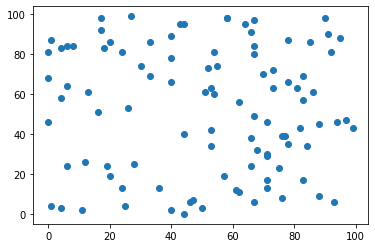

In [41]:
dots = np.random.randint(0,100,(100,2))
plt.scatter(dots[:,0],dots[:,1])
plt.show()

In [42]:
cluster = KMeans(3)
cluster.fit(dots)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
cluster.cluster_centers_

array([[74.33333333, 67.38461538],
       [48.82857143, 16.71428571],
       [19.61538462, 77.34615385]])

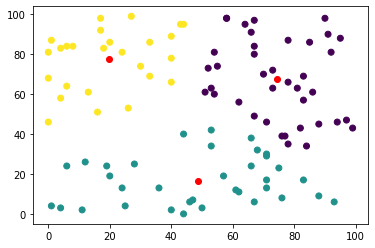

In [47]:
plt.scatter(dots[:,0],dots[:,1],c=cluster.labels_)
plt.scatter(cluster.cluster_centers_[:,0], cluster.cluster_centers_[:,1],c='r')
plt.show()

## 手动实现

In [48]:
class KMeans_:
    def __init__(self, X, k_clusters):
        self.X = X
        self.k = k_clusters
        self.init = None
        self.idx = None
        self.centroids = None
    
    def initialize_centroids(self):
        self.init = self.X[np.random.choice(self.X.shape[0], self.k), :]
        return self.init
    
    def update_idx(self):
        if self.centroids is None:
            self.centroids = self.init
        self.idx = np.array([np.argmin(np.linalg.norm(self.X[i,:] - self.centroids, axis=1)) 
                             for i in range(self.X.shape[0])])
        return self.idx
    
    def update_centroids(self):
        for i in range(self.k):
            clustering_index = np.where(self.idx == i)
            self.centroids[i,:] = np.mean(self.X[clustering_index], axis=0)
    
    def fit(self, max_iters=20):
        self.centroids = self.initialize_centroids()
        self.idx = self.update_idx()
        for i in range(max_iters):
            self.centroids = self.update_centroids()
            self.update_idx()

    def cluster_centers_(self):
        return self.centroids
    
    def predict(self):
        return self.idx

In [62]:
cluster_ = KMeans_(dots, 4)
cluster_.fit()
labels_ = cluster_.predict()
centroids = cluster_.cluster_centers_()

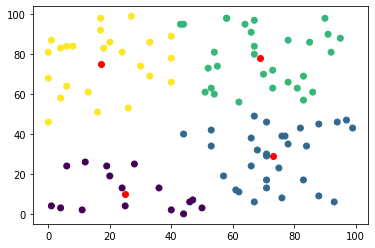

In [63]:
plt.scatter(dots[:,0],dots[:,1],c=labels_)
plt.scatter(centroids[:,0], centroids[:,1],c='r')
plt.show()